In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
import yfinance as yf

In [9]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [10]:
stock = 'GOOG'
google_data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [11]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-27,28.322241,28.322241,27.570307,27.846546,27.814894,262719
2014-03-28,27.983171,28.243956,27.857019,27.922838,27.891100,824257
2014-03-31,28.266893,28.272379,27.770258,27.772251,27.740683,216593
2014-04-01,27.859013,28.344681,27.859013,28.280355,28.248211,158434
2014-04-02,29.917362,30.158699,28.032537,28.272379,28.240242,2942055


In [12]:
google_data.shape

(2596, 6)

In [13]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2.596000e+03
mean,74.736525,75.533050,74.004032,74.789093,74.706334,3.180730e+07
std,41.653670,42.134399,41.242981,41.697186,41.655672,1.591155e+07
min,24.664783,24.730902,24.311253,24.560070,24.532154,1.584340e+05
25%,38.961625,39.135251,38.675424,38.872375,38.828189,2.193800e+07
50%,59.120499,59.707748,58.568750,59.231749,59.164423,2.794425e+07
75%,108.892374,111.339853,107.603748,109.384373,109.260038,3.656800e+07
max,191.750000,193.309998,190.619995,192.660004,192.660004,2.232980e+08


In [14]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2596 entries, 2014-03-27 to 2024-07-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2596 non-null   float64
 1   High       2596 non-null   float64
 2   Low        2596 non-null   float64
 3   Close      2596 non-null   float64
 4   Adj Close  2596 non-null   float64
 5   Volume     2596 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 142.0 KB


In [15]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

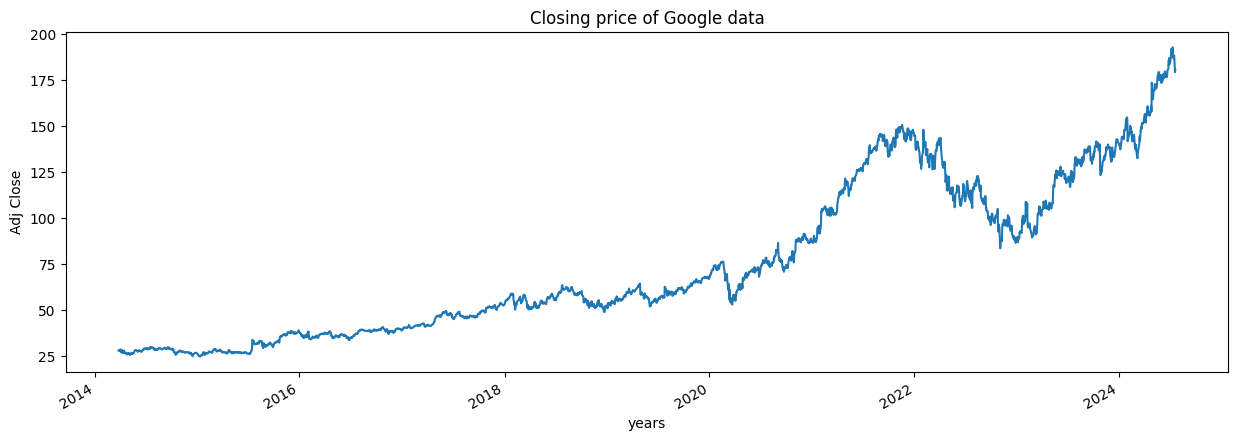

In [17]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [18]:
def plot_graph(figsize, values, column_name ):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [19]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

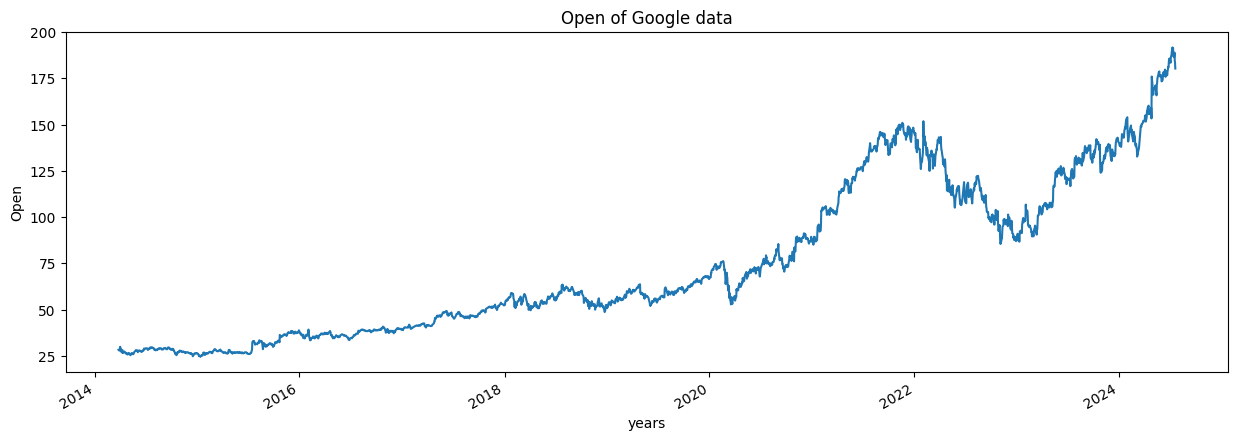

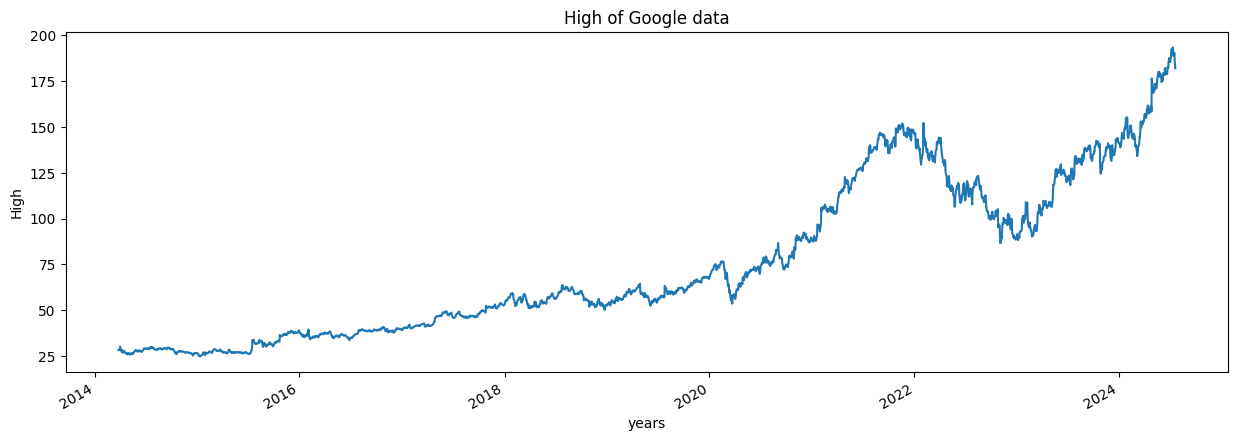

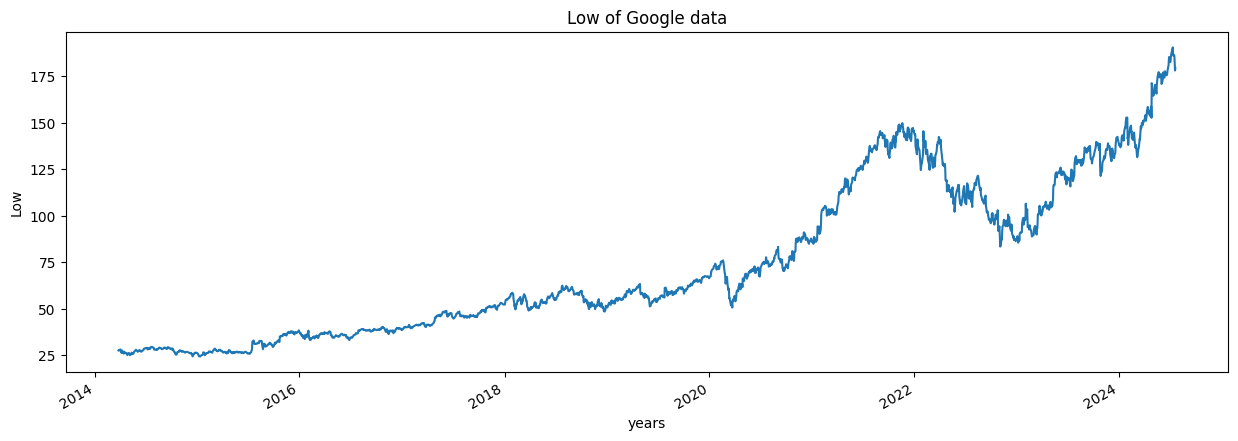

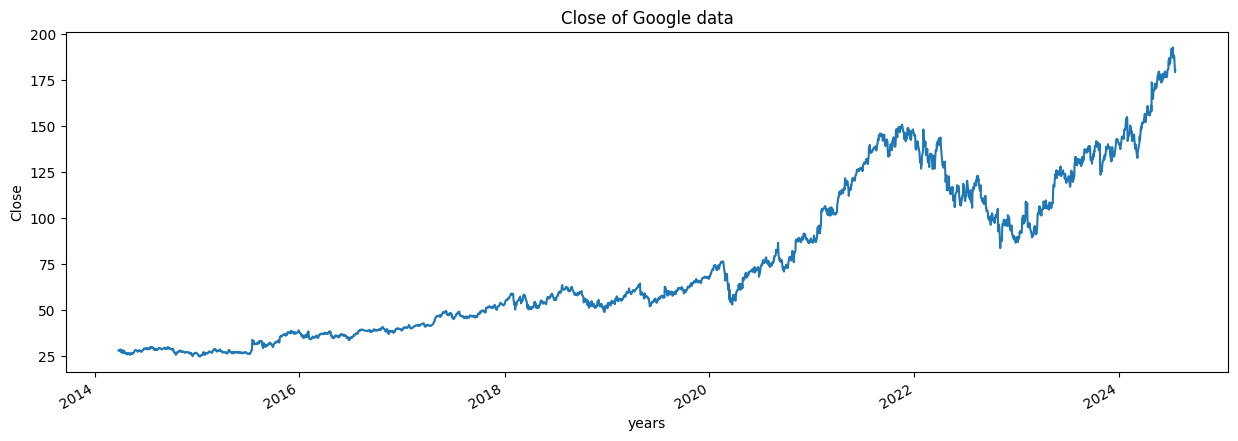

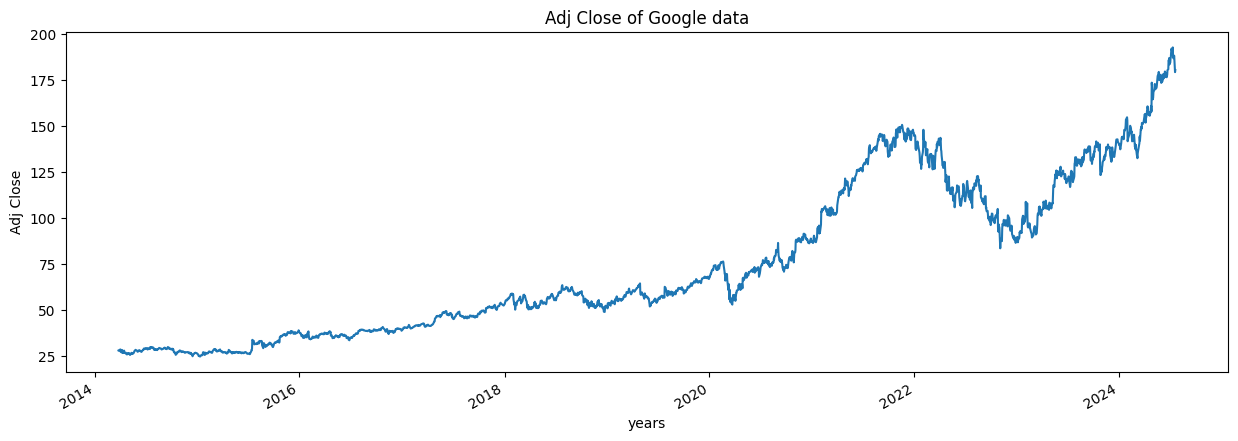

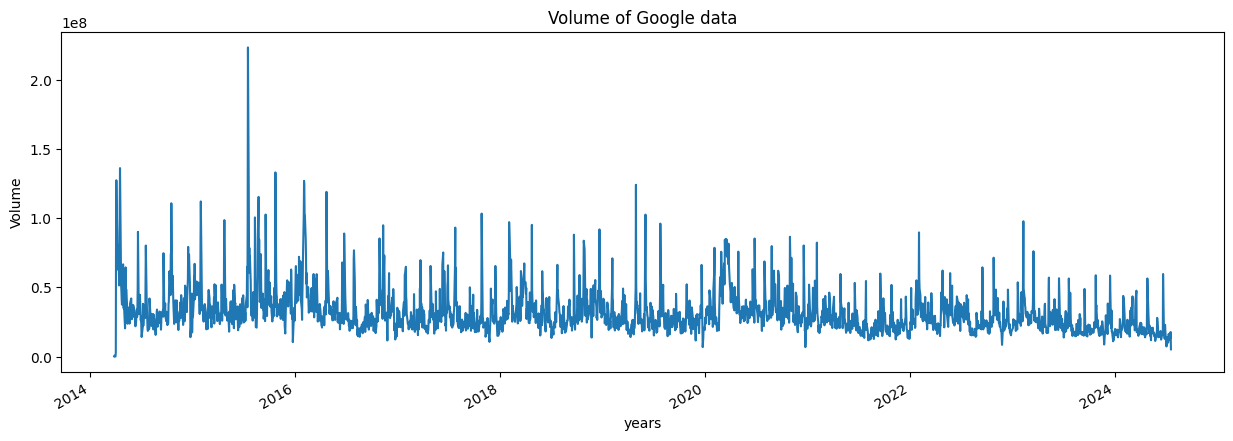

In [20]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [21]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [22]:
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [23]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [24]:
for i in range(2004,2025):
    print(i, list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 0
2013 0
2014 194
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 138


In [25]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [26]:
google_data['MA_for_250_days'][0:250].tail()

Date
2015-03-18         NaN
2015-03-19         NaN
2015-03-20         NaN
2015-03-23         NaN
2015-03-24    27.40021
Name: MA_for_250_days, dtype: float64

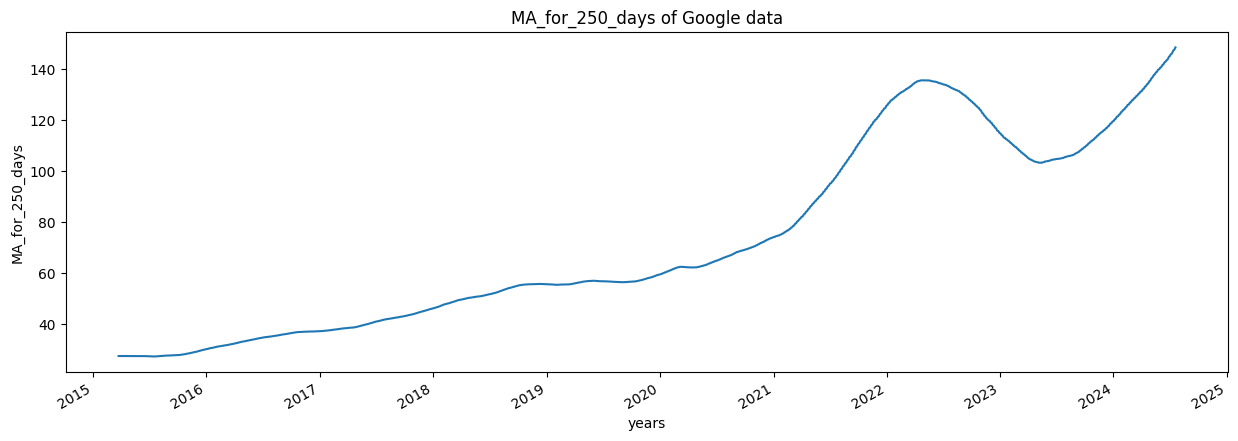

In [27]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

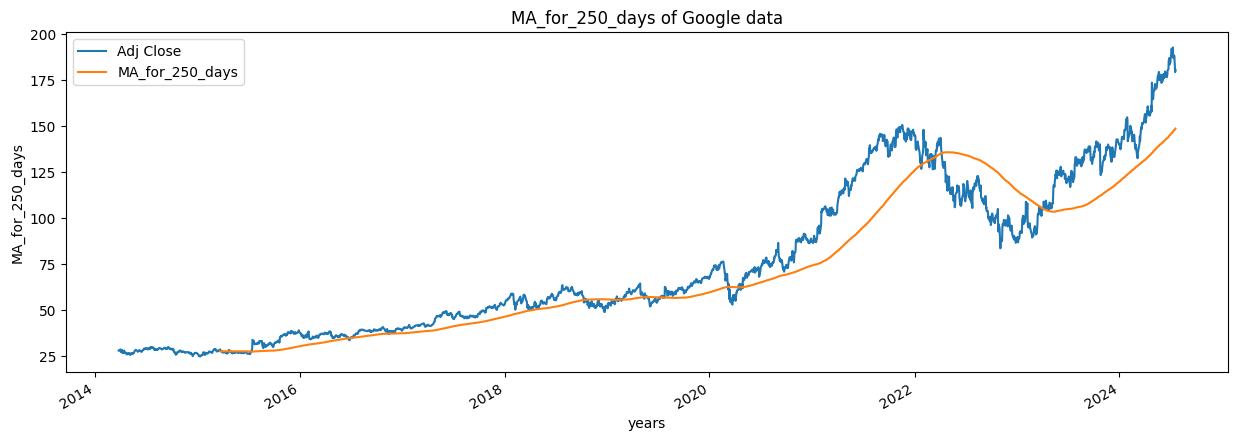

In [28]:
plot_graph((15,5), google_data[['Adj Close', 'MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

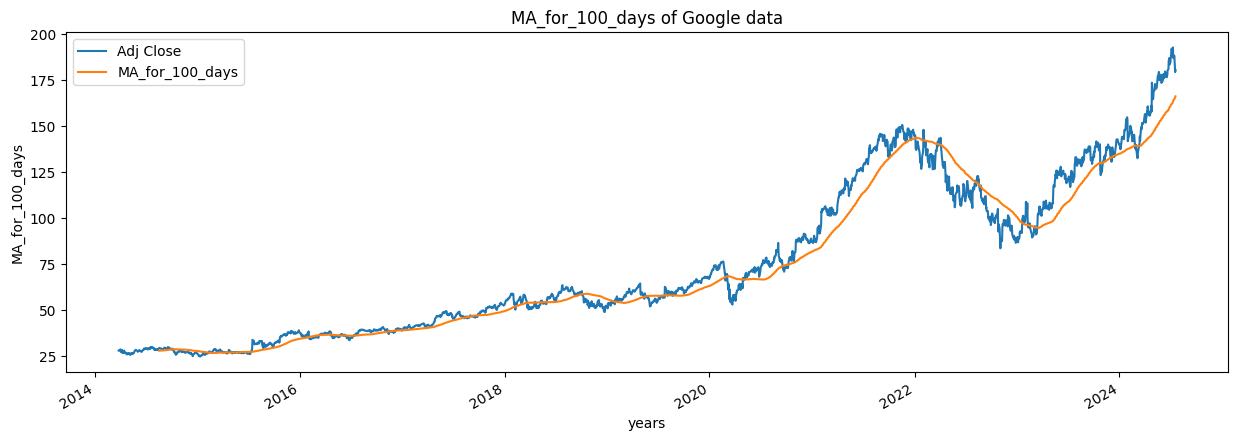

In [29]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close', 'MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

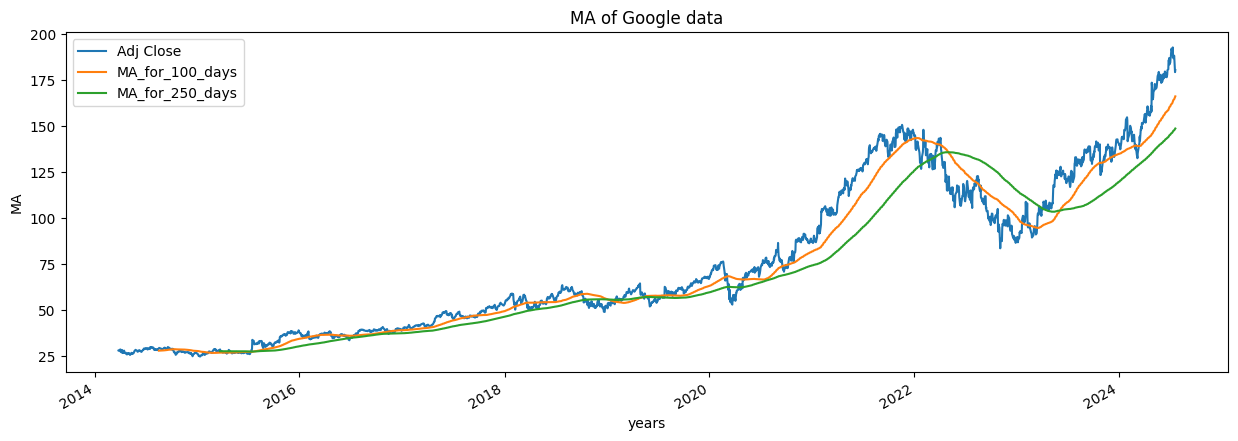

In [30]:
plot_graph((15,5), google_data[['Adj Close', 'MA_for_100_days', 'MA_for_250_days']], 'MA')

In [31]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2014-03-27,27.814894,NaN
2014-03-28,27.891100,0.002740
2014-03-31,27.740683,-0.005393
2014-04-01,28.248211,0.018295
2014-04-02,28.240242,-0.000282


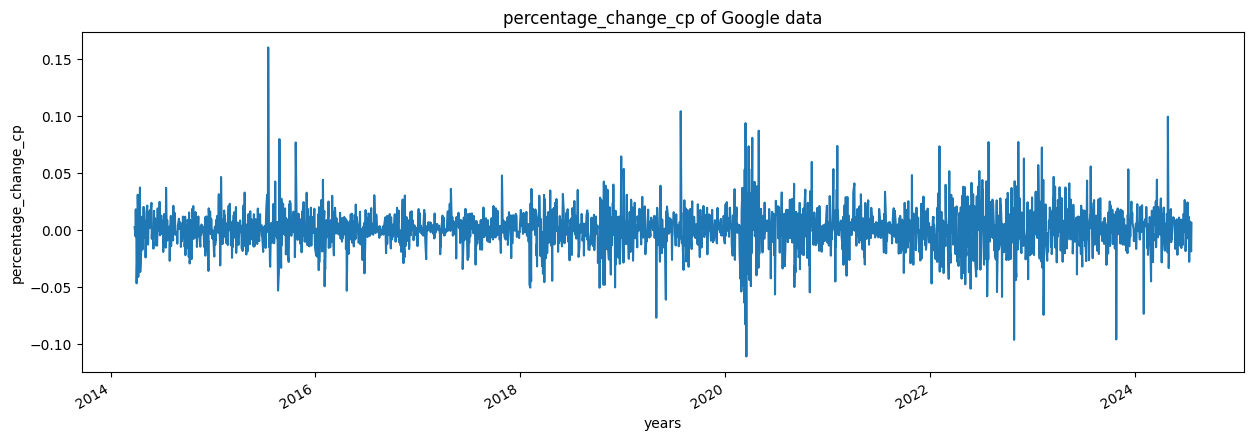

In [32]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change_cp')

In [33]:
Adj_close_price = google_data[['Adj Close']]

In [34]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.66000366]), array([24.53215408]))

In [35]:
from sklearn.preprocessing import MinMaxScaler 

In [36]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.01952526],
       [0.01997852],
       [0.01908386],
       ...,
       [0.94028349],
       [0.92006082],
       [0.92678129]])

In [37]:
len(scaled_data)

2596

In [38]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [39]:
x_data[0],y_data[0]

(array([[0.01952526],
        [0.01997852],
        [0.01908386],
        [0.02210257],
        [0.02205517],
        [0.02286686],
        [0.01498685],
        [0.01350861],
        [0.01847065],
        [0.02120792],
        [0.01433808],
        [0.01127198],
        [0.01184077],
        [0.01300204],
        [0.01895648],
        [0.01290131],
        [0.01068542],
        [0.01251916],
        [0.01018774],
        [0.00966043],
        [0.00700018],
        [0.00728754],
        [0.01041287],
        [0.01010479],
        [0.01149417],
        [0.01048101],
        [0.01044547],
        [0.00669209],
        [0.00515755],
        [0.00546565],
        [0.0077556 ],
        [0.01107053],
        [0.01200962],
        [0.01010183],
        [0.0081259 ],
        [0.00831845],
        [0.01075653],
        [0.01102611],
        [0.01374264],
        [0.01555564],
        [0.01781891],
        [0.02174412],
        [0.02047917],
        [0.02000518],
        [0.0199489 ],
        [0

In [40]:
int(len(x_data)*0.7)

1747

In [41]:
4990-100-int(len(x_data)*0.7)

3143

In [42]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1747, 100, 1)
(1747, 1)
(749, 100, 1)
(749, 1)


In [44]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [45]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

c:\Users\incha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
model.fit(x_train,y_train, batch_size=1, epochs = 4)

Epoch 1/4
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - loss: 0.0015
Epoch 2/4
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 65s 37ms/step - loss: 3.7360e-04
Epoch 3/4
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - loss: 2.6064e-04
Epoch 4/4
1747/1747 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - loss: 2.1361e-04


In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [49]:
predictions = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


In [50]:
predictions

array([[0.6539587 ],
       [0.64519894],
       [0.64433753],
       [0.64038527],
       [0.6438333 ],
       [0.64780223],
       [0.6482074 ],
       [0.6519977 ],
       [0.6535474 ],
       [0.6576929 ],
       [0.65905344],
       [0.6569351 ],
       [0.65899384],
       [0.66007745],
       [0.66259575],
       [0.65620923],
       [0.65061545],
       [0.65138197],
       [0.65968144],
       [0.6745664 ],
       [0.6839919 ],
       [0.6867248 ],
       [0.68157125],
       [0.6896601 ],
       [0.69707024],
       [0.6986481 ],
       [0.6998967 ],
       [0.6929151 ],
       [0.69332945],
       [0.6983552 ],
       [0.69786656],
       [0.69759285],
       [0.684374  ],
       [0.6872653 ],
       [0.6901959 ],
       [0.69939625],
       [0.69824684],
       [0.6832272 ],
       [0.667143  ],
       [0.6669296 ],
       [0.6757512 ],
       [0.6834866 ],
       [0.68833184],
       [0.68297064],
       [0.6559653 ],
       [0.6400027 ],
       [0.6334194 ],
       [0.649

In [51]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[134.48082 ],
       [133.00806 ],
       [132.86324 ],
       [132.19875 ],
       [132.77846 ],
       [133.44574 ],
       [133.51387 ],
       [134.15112 ],
       [134.41167 ],
       [135.10864 ],
       [135.33739 ],
       [134.98123 ],
       [135.32736 ],
       [135.50955 ],
       [135.93295 ],
       [134.85919 ],
       [133.91873 ],
       [134.04759 ],
       [135.44298 ],
       [137.94554 ],
       [139.53024 ],
       [139.98972 ],
       [139.12326 ],
       [140.48322 ],
       [141.72906 ],
       [141.99435 ],
       [142.20427 ],
       [141.03047 ],
       [141.10014 ],
       [141.94511 ],
       [141.86296 ],
       [141.81694 ],
       [139.59447 ],
       [140.08058 ],
       [140.5733  ],
       [142.12013 ],
       [141.9269  ],
       [139.40167 ],
       [136.69746 ],
       [136.66159 ],
       [138.14474 ],
       [139.44528 ],
       [140.2599  ],
       [139.35854 ],
       [134.81819 ],
       [132.13443 ],
       [131.02759 ],
       [133.6

In [52]:
y_test

array([[0.66434164],
       [0.66528624],
       [0.65744692],
       [0.66201273],
       [0.66373856],
       [0.66224443],
       [0.66765972],
       [0.66823004],
       [0.67396915],
       [0.67453058],
       [0.67211254],
       [0.6762713 ],
       [0.67636941],
       [0.67939933],
       [0.6698015 ],
       [0.66546159],
       [0.66750226],
       [0.67655355],
       [0.69237169],
       [0.70008913],
       [0.70336564],
       [0.69845241],
       [0.71287444],
       [0.71833429],
       [0.71828973],
       [0.72054731],
       [0.71090492],
       [0.71420811],
       [0.71862834],
       [0.71485276],
       [0.715031  ],
       [0.69725233],
       [0.70642533],
       [0.70607483],
       [0.71676873],
       [0.71182283],
       [0.69453425],
       [0.67999932],
       [0.68373924],
       [0.6914152 ],
       [0.69669091],
       [0.70148234],
       [0.69475706],
       [0.66316825],
       [0.65328816],
       [0.6458292 ],
       [0.66482284],
       [0.648

In [53]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_train = scaler.inverse_transform(y_train)
inv_y_test

array([[136.22648621],
       [136.38529968],
       [135.06729126],
       [135.83493042],
       [136.12509155],
       [135.87388611],
       [136.78434753],
       [136.88023376],
       [137.84513855],
       [137.93952942],
       [137.5329895 ],
       [138.23219299],
       [138.24868774],
       [138.75810242],
       [137.1444397 ],
       [136.41477966],
       [136.75787354],
       [138.27964783],
       [140.93911743],
       [142.2366333 ],
       [142.7875061 ],
       [141.9614563 ],
       [144.38619995],
       [145.30415344],
       [145.29666138],
       [145.67622375],
       [144.05506897],
       [144.61042786],
       [145.35359192],
       [144.71881104],
       [144.7487793 ],
       [141.75968933],
       [143.30192566],
       [143.24299622],
       [145.04093933],
       [144.20939636],
       [141.30270386],
       [138.85897827],
       [139.48776245],
       [140.77830505],
       [141.66529846],
       [142.47087097],
       [141.34016418],
       [136

In [54]:
rmse = np.sqrt(np.mean((inv_predictions-inv_y_test)**2))

In [55]:
rmse

3.666781022182745

In [56]:
plotting_data = pd.DataFrame(
    {
        'Original_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1),
    } ,
        index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,Original_test_data,predictions
Date,,
2021-07-28,136.226486,134.480820
2021-07-29,136.385300,133.008057
2021-07-30,135.067291,132.863235
2021-08-02,135.834930,132.198746
2021-08-03,136.125092,132.778458


<Figure size 640x480 with 0 Axes>

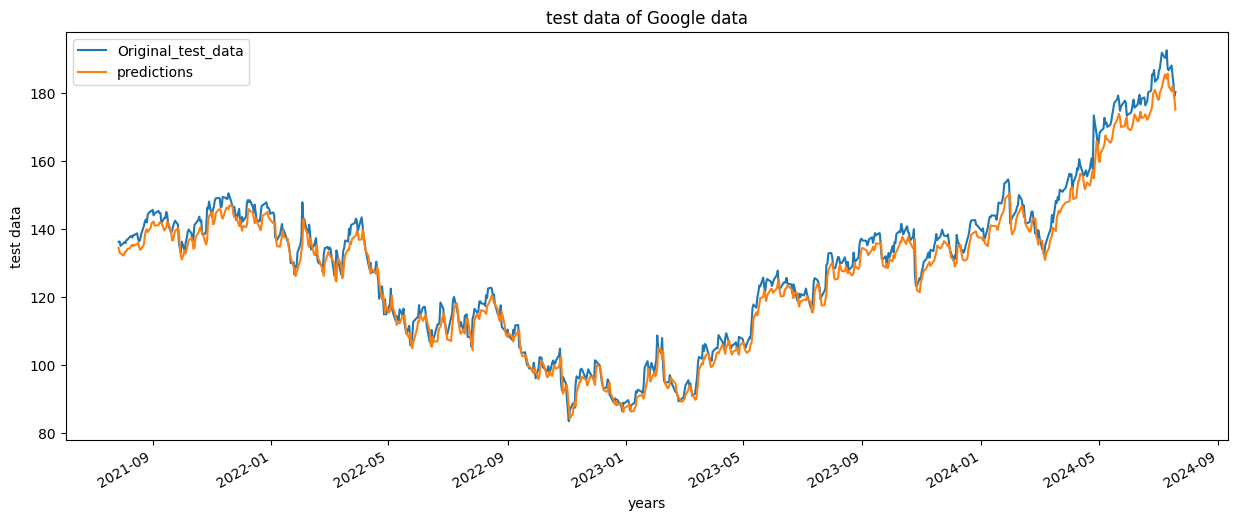

In [57]:
plot_graph((15,6), plotting_data, 'test data')

<Figure size 640x480 with 0 Axes>

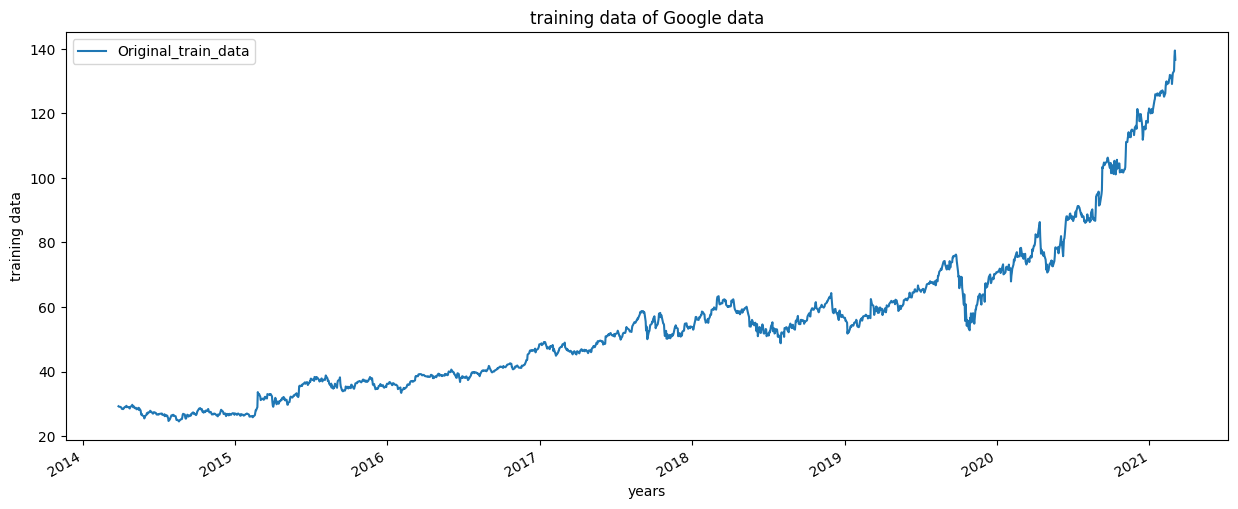

In [60]:
training_data = pd.DataFrame(
    {
        'Original_train_data': inv_y_train.reshape(-1)
    } ,
        index = google_data.index[:splitting_len]
)
plotting_data.head()


plot_graph((15,6), training_data, 'training data')

<Figure size 640x480 with 0 Axes>

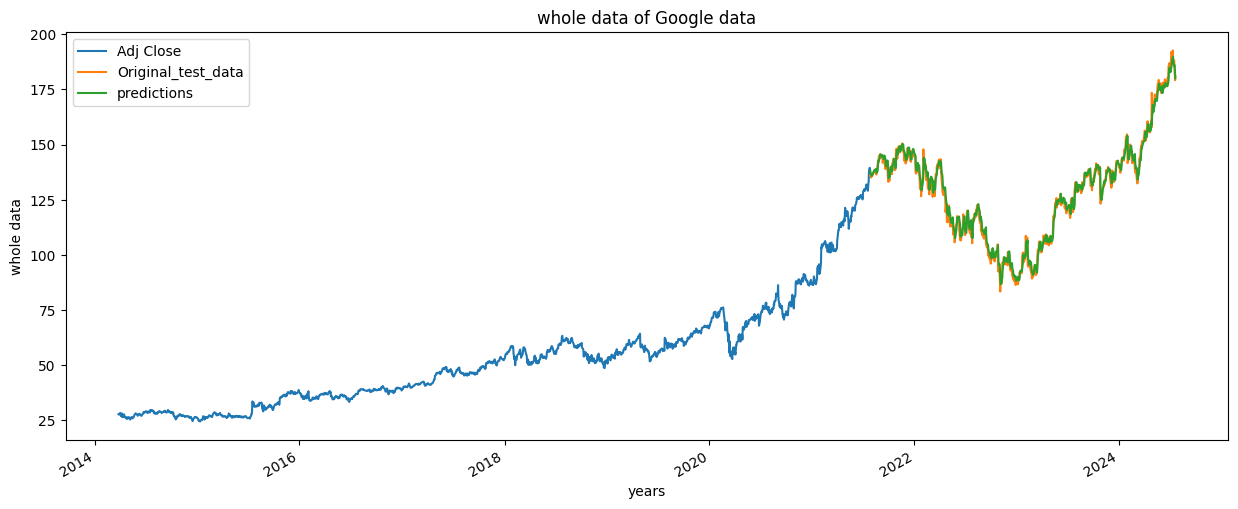

In [ ]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100], plotting_data], axis=0), 'whole data')

In [ ]:
last_100 = google_data[['Adj Close']].tail(100) 
last_100.tail()

,Adj Close
Date,
2024-07-15,188.190002
2024-07-16,185.500000
2024-07-17,182.619995
2024-07-18,179.220001
2024-07-19,181.020004


In [ ]:
last_100 = scaler.fit_transform(last_100['Adj Close'].values.reshape(-1,1)).reshape(1,-1,1)
last_100


array([[[0.12500187],
        [0.08073719],
        [0.11969643],
        [0.0915132 ],
        [0.0271887 ],
        [0.02022571],
        [0.        ],
        [0.04443055],
        [0.06183753],
        [0.10577069],
        [0.11704384],
        [0.13610938],
        [0.19529432],
        [0.15931894],
        [0.26392896],
        [0.25464514],
        [0.28382316],
        [0.26823962],
        [0.31847224],
        [0.30819364],
        [0.31731183],
        [0.32129072],
        [0.32659565],
        [0.39688836],
        [0.38644387],
        [0.39473316],
        [0.32129072],
        [0.35444763],
        [0.39092015],
        [0.42407706],
        [0.41611953],
        [0.46800971],
        [0.44148454],
        [0.39407013],
        [0.38859907],
        [0.40318833],
        [0.41280366],
        [0.38395716],
        [0.42092707],
        [0.45358658],
        [0.47314927],
        [0.42092707],
        [0.68187193],
        [0.5858827 ],
        [0.53183707],
        [0

In [ ]:
last_100.shape

(1, 100, 1)

In [ ]:
day_101 = model.predict(last_100)
day_101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.8047513]], dtype=float32)

In [ ]:
scaler.inverse_transform(day_101)

array([[180.89613]], dtype=float32)

In [ ]:
import numpy as np


def predict_future_stock(no_of_days, prev_100):
    future_predictions = []
    prev_100 = scaler.fit_transform(prev_100['Adj Close'].values.reshape(-1,1)).reshape(1,-1,1)
    for _ in range(no_of_days):
        next_day = model.predict(prev_100)[0, 0]  
        future_predictions.append(next_day)
        prev_100 = np.append(prev_100[:, 1:, :], [[[next_day]]], axis=1)  
    return scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

In [ ]:
no_of_days = 10  
future_results = predict_future_stock(no_of_days, prev_100= google_data[['Adj Close']].tail(100))
print(future_results)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[180.89613 181.13995 181.49518 181.84175 182.12552 182.32661 182.44641
 182.4982  182.5002  182.47064]


Text(0.5, 1.0, 'Future Close price of Google stock')

<Figure size 640x480 with 0 Axes>

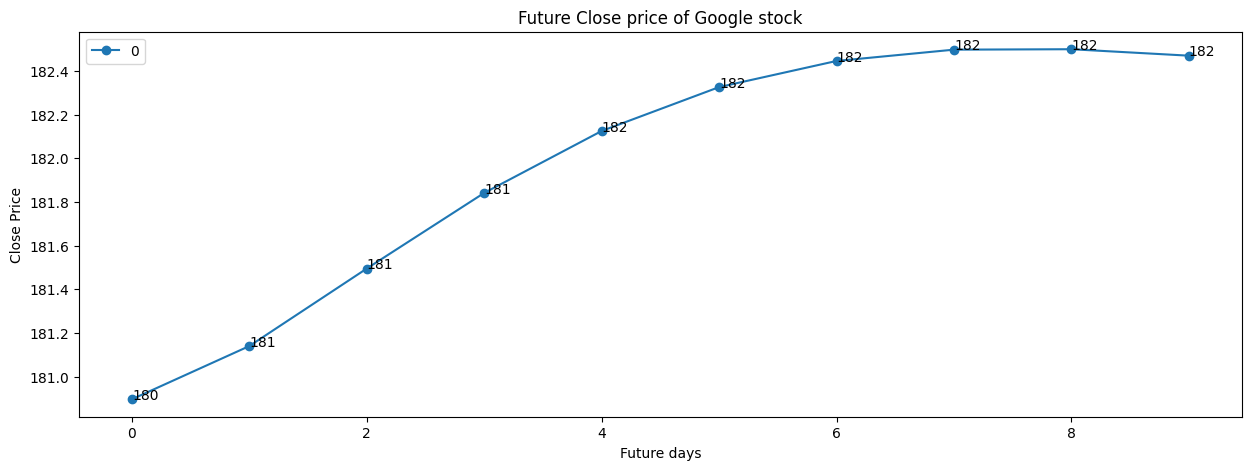

In [ ]:
future_results = np.array(future_results).reshape(-1,1)
plt.figure()
pd.DataFrame(future_results).plot(figsize=(15,5), marker='o')
for i in range(len(future_results)):
    plt.text(i, future_results[i], int(future_results[i][0]))
plt.xlabel('Future days')
plt.ylabel('Close Price')
plt.title("Future Close price of Google stock")

In [ ]:
model.save("Latest_stcok_price_model.keras")